# Open and file descriptors

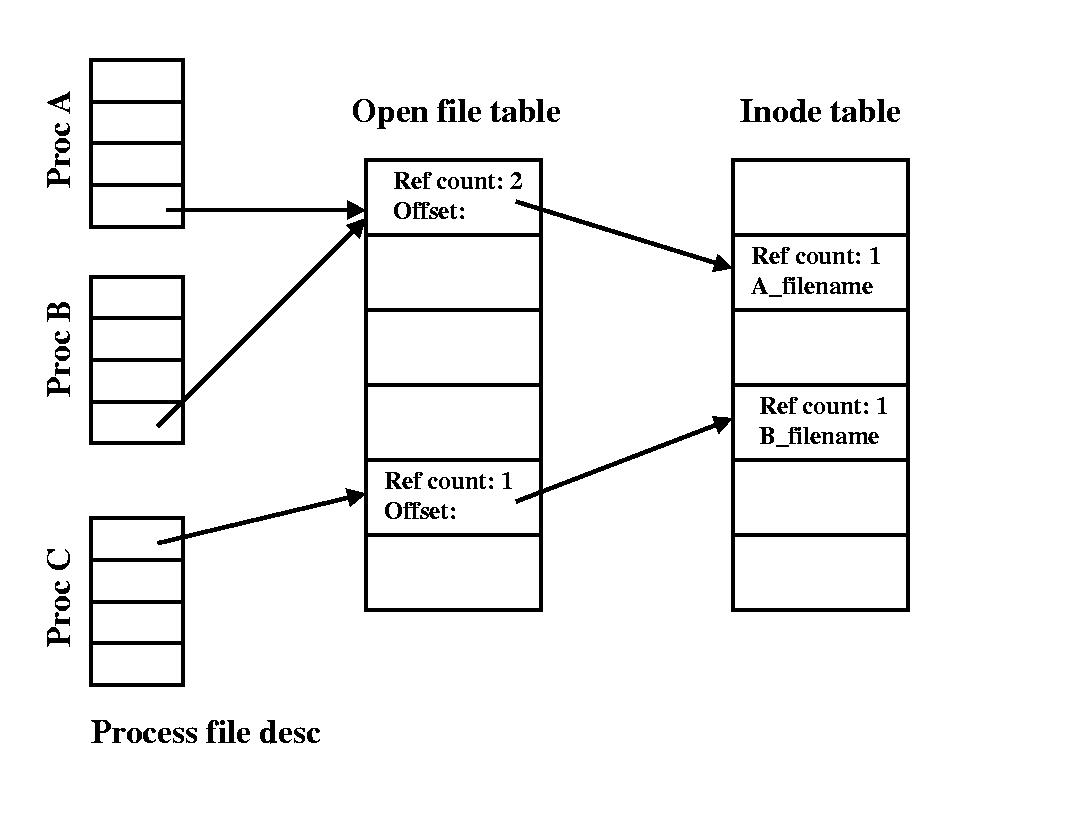

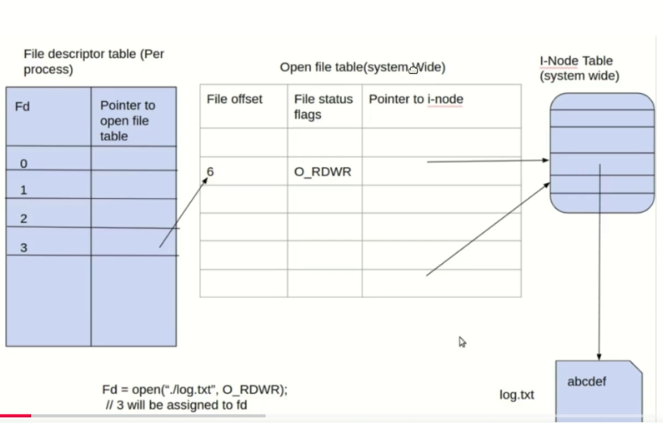

**There is one file table entry per open() call, and it is shared if the file descriptor is dup()ed or fork()ed.**

- **When two or more processes open a file for reading, there's an entry in the open file table per open. There is even an entry per open if one process opens the file multiple times.**
- **A single entry is not created in the open file table for different processes opening the same file (but there is just one entry in the in-memory inode table).**
- **If file1.txt is opened twice, in the same or two different processes, there are two different open file table entries (but just one entry in the in-memory inode table).**

**The Open File Table stores the information about all the files that are open while the OS is running.**

**The Open system call creates an entry in the Open file table when a process opens a file. If the file is opened again by some other process (or the same process), the Open system call a new entry is created in the open file table.**

**Every process on a Unix-like operating system maintains its own file descriptor table**, a private list of small integers (file descriptors) that act as indexes to entries in the **shared, system**\-wide Open File Table. This structure allows each process to track its open files, like standard input (0), standard output (1), and standard error (2), and interact with the operating system for I/O operations. When a process performs an operation, the kernel uses the file descriptor to find the correct entry in the Open File Table, which contains details like the current file position and flags, and then uses this to locate the actual file's metadata via the inode table.

**How File Descriptors Work**

- **Process-Specific Table**: Each process gets its own unique file descriptor table when it starts.
- **File Descriptors**: The table contains simple integer values that the process uses to refer to open files.
- **System-Wide Open File Table**: These integers are not the files themselves, but rather indexes into a central table managed by the operating system.
- **Open File Table Entry**: Each entry in this shared table stores information such as the current file offset (where you are in the file) and the open mode (read, write, etc.).
- **Inode Table**: The Open File Table entry points to the inode table, which holds all the file's metadata, such as its permissions, size, and disk location.

An inode table is a data structure used in Unix-like file systems (like Linux) that contains a collection of inodes, where each inode stores metadata for a file or directory. Every file and directory is assigned a unique inode, identified by an inode number, which contains essential information such as permissions, owner, size, and the location of the actual file data. The inode table itself is stored on disk, and only the inodes for currently accessed files are loaded into memory by the operating system.

**What it contains**

- **Metadata:**The inode table stores metadata, which is data about a file rather than the file's content itself.
- **Unique Identifiers:**Each file and directory has a unique inode number, which serves as its identifier within the file system.
- **File System Structure:**It's a fundamental part of the file system that allows the operating system to locate and manage files effectively.

**How it works**

- **Directory Entries:** A directory in a file system is essentially a special file containing a list of names and their corresponding inode numbers.
- **Locating Files:** When you try to access a file, the operating system first finds its entry in the relevant directory.
- **Accessing Inode:** The directory entry points to the file's unique inode number, which is then used to locate the inode in the inode table.
- **Retrieving Data:** The inode, in turn, contains pointers to the actual data blocks on the disk, allowing the file system to retrieve the file's content.

# Running processes

1\. ps -ef  :  can be used to list all running process.

2\. Each process has a unique ID called as Process ID (PID in short)

3\. Every Process has a parent Process (PPID)

- PID - '0' is swapper process

- PID - '1' is INIT process

6\. Each Process has its own memory space, i.e

&nbsp;   a. Text/code segment

&nbsp;   b. Data segment(Global and Static variables)

&nbsp;   c.  Stack segment(local variables)

&nbsp;   d.  Heap segment(Dynamic allocation)

# Virtual memory in Linux

1\. It gives a virtual feeling for each process, that it own the complete Physical memory(i.e RAM).

2\. It gives virtual feeling to each process, that it can have more memory than the available Physical memory.

- Physical memory is Real memory(It does exist)

- Virtual memory is a conceptual memory(It is only like a imaginary memory )

- CPU executes code/instruction from Physical memory(and not from virtual memory)

- Each process hold instructions/code, data, stack, heap in the imaginary Virtual memory, this data/instruction is copied to real memory(Physical memory) at time of execution.

# Page Table

1\. Each process has its own page table.

- When the Process copies data/instruction (contents of page memory) from virtual memory to Physical memory,  it creates a entry of that particular Virtual memory's Page in 'page table'.

- This Page table entry will inform CPU whether, the required data from each process's virtual memory is present in Physical RAM or not.

4\. The Page in Physical memory can be swapped in/out from/to secondary memory(like hard disk or equivalent).

5\. When page from Physical memory is copied to secondary memory, the Page table entry of that particular page is deleted, similarly, when page data is copied from secondary memory back to physical memory, a entry in page table is made for that particular page.

NOTE: Physical memory refers to RAM memory

What is Page Fault?

Page fault is kind of indication informing system that the required page of memory was not present on the corresponding Process's 'Page table', and this page of memory needs to be copied on to  Physical memory for further instruction/data processing.

Note: Page Fault occurs for a "running Process" when its required page is not present in Physical memory.

# Memory



compiler construction - If v8 uses the 

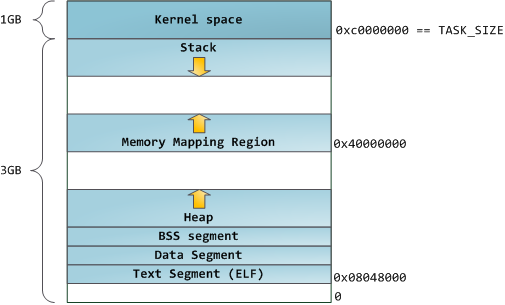

A memory mapping region is a segment of a process's virtual memory that is linked to a different entity, such as a file on disk or a device, enabling the program to access the contents of that entity as if they were actual memory. This allows programs to read from and write to files using standard memory operations, without traditional, explicit read/write calls, and also facilitates efficient memory sharing between different processes.

Mapped memory regions, also called shared memory areas, can serve as a large pool for exchanging data among processes. The available subroutines do not provide locks or access control among the processes. Therefore, processes using shared memory areas must set up a signal or semaphore control method to prevent access conflicts and to keep one process from changing data that another is using. Shared memory areas can be most beneficial when the amount of data to be exchanged between processes is too large to transfer with messages, or when many processes maintain a common large database.

# Memory Allocation

1\. Below  are widely used dynamic memory allocation **library calls (and not system calls)**

&nbsp; a.  malloc()

&nbsp; b.  calloc() - This function is same as malloc() but initializes the memory allocated with '0'

&nbsp; c.   realloc() - Is used if there is a need to change the size of already allocated memory.

2\. Dynamic memory is allocated in 'Heap' segment

- All above functions return (void\*) - pointer to allocated memory if success, NULL if failure

- syntax:

# include &lt;stdlib.h&gt;

void \*malloc(size_t size);

void \*calloc(size_t nmemb, size_t size);

void \*realloc(void \*ptr, size_t size);

5\. free() is used for freeing the dynamically allocated memory

&nbsp;   Syntax of free():      void free(void \*ptr); // ptr variable points to the memory that needs to be freed.

6\. Do not  call free() on same pointer (same memory location) twice.

7\. After free(), it is good practice to assign the pointer to NULL(because the memory is already de-allocated, and the pointer now does not point to a valid memory location)

# Alloc A=> not dynamic but static memory

The **alloca**() function allocates _size_ bytes of space in the stack frame of the caller. This temporary space is automatically freed when the function that called **alloca**() returns to its caller.

RETURN VALUE The alloca() function returns a pointer to the beginning of the allocated space. If the allocation causes stack overflow, program behaviour is undefined.

# Fork()

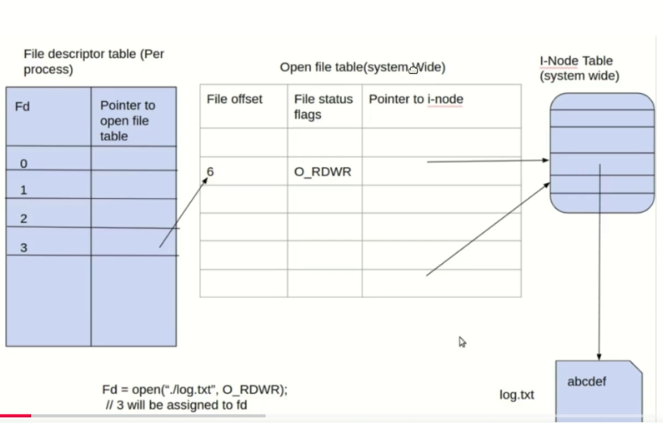

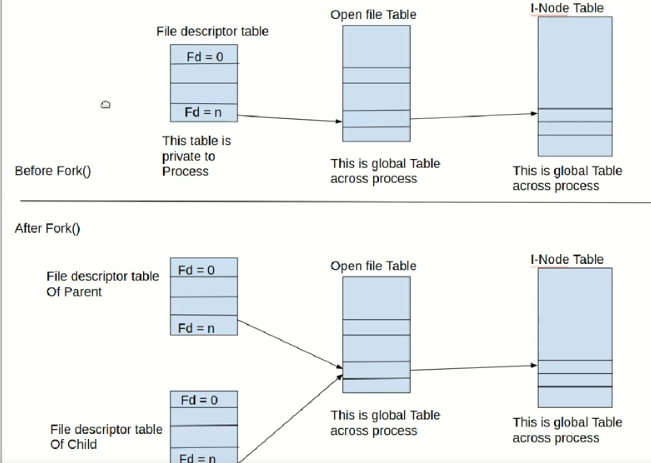

Both parent and child point to the same open file table

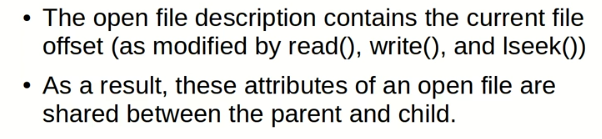

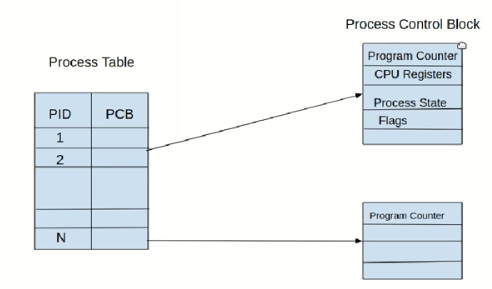

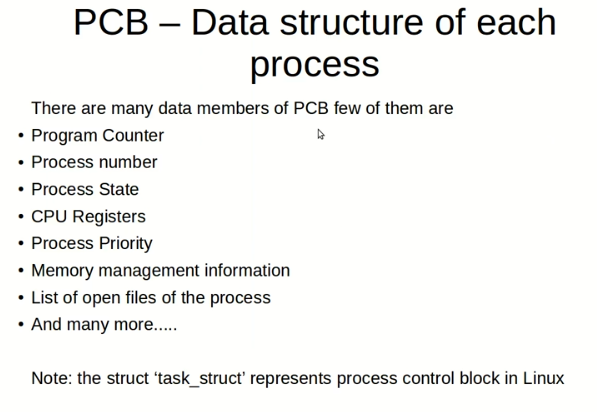

# Orphan process

If a parent process returns while child process continues, than child becomes orphan, gets a new pid and finishes its job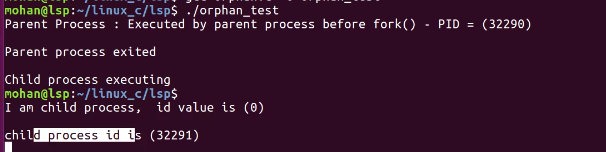

If the exit of the process causes a process group to become orphaned, and if any member of the newly orphaned process group is stopped, a SIGHUP signal followed by a SIGCONT signal is sent to each process in the newly orphaned process group.

# Zombie process

When a child process finishes before the parent, because the entry of the child process still stays in the process table, it is a zombie.

You might notice occasional defunct processes, also called zombies, in your process table. These processes are no longer executing, have no system space allocated, but still retain their PID number. You can recognize a zombie process in the process table because it displays &lt;defunct&gt; in the CMD column.

We see &lt;defunct&gt; in the terminal when checked with ps aux | grep Z

Zombie processes continue to exist in the process table until the parent process dies or the system is shut down and restarted.

# Signal

- Ctrl+C sends SIGINT which asks to interrupt a program but can be caught or ignored.
- Ctrl+Z sends SIGTSTP which asks to pause a program but can be caught or ignored. This process can be resumed later.
- Ctrl+\\ sends SIGQUIT which is the same as SIGINT except it also produces a core dump.
- Ctrl+D sends SIGTERM

# Kill

Normally, you use the kill command to end a process.

The kill command sends a signal to the designated process. Depending on the type of signal and the nature of the program that is running in the process, the process might end or might keep running. The signals you send are:

SIGTERM

(signal 15) is a request to the program to terminate. If the program has a signal handler for SIGTERM that does not actually terminate the application, this kill may have no effect. This is the default signal sent by kill.

SIGKILL

(signal 9) is a directive to kill the process immediately. This signal cannot be caught or ignored.

It is typically better to issue SIGTERM rather than SIGKILL. If the program has a handler for SIGTERM, it can clean up and terminate in an orderly fashion. Type:

kill -term ProcessID

(The -term could be omitted.) If the process does not respond to the SIGTERM, type:

kill -kill ProcessID

kill -15 \[pid\] also sends SIGTERM

# Kill-signal

kill - send signal to a process

**int kill(pid_t** _pid_**, int** _sig_**);**

Kill(cpid, SIGUSR2);

Burada kill aslinda temninate icin olsa da biz bahsi gecen pid li processe SIGUSR2 yi gonderiyoruz.

**typedef typeof(void (int)) \*sighandler_t;**

**sighandler_t signal(int** _signum_**, sighandler_t** _handler_**);**

signal(SIGUSR2, signal_handler);

dedik ki sana bu sinyal geldiginde bu fonksiyonu cagir,

fonksiyon ise termination yok, sadece print, dolayisiyla olen bir process yok

ama eger SIGTERM (-15) gonderseydi ve signal(SIGTERM, SIG_DFL) default olsaydi, o zmn kill terminate ederdi.

Kill -15 pid diye baska bir terminalde gondermek, 15 SIGTERM oldugu icin o prosese SIGTERM gondermek demek

# Exec()

There is no exec system call -- this is usually used to refer to all the execXX calls as a group. They all do essentially the same thing: loading a new program into the current process, and provide it with arguments and environment variables. The differences are in how the program is found, how the arguments are specified, and where the environment comes from.

- The calls with v in the name take an array parameter to specify the argv\[\] array of the new program. The end of the arguments is indicated by an array element containing NULL.
- The calls with l in the name take the arguments of the new program as a variable-length argument list to the function itself. The end of the arguments is indicated by a (char \*)NULL argument. You should always include the type cast, because NULL is allowed to be an integer constant, and default argument conversions when calling a variadic function won't convert that to a pointer.
- The calls with e in the name take an extra argument (or arguments in the l case) to provide the environment of the new program; otherwise, the program inherits the current process's environment. This is provided in the same way as the argv array: an array for execve(), separate arguments for execle().
- The calls with p in the name search the PATH environment variable to find the program if it doesn't have a directory in it (i.e. it doesn't contain a / character). Otherwise, the program name is always treated as a path to the executable.
- FreeBSD 5.2 added another variant: execvP (with uppercase P). This is like execvp(), but instead of getting the search path from the PATH environment variable, it's an explicit parameter to the function:

Every process has its own virtual memory however in threads, they share the same memory except for the stack part.

And when we were doing **int execl(const char \***_path_**, const char \***_arg_**, ...); like execl("./program2", "arg1", "arg2", NULL);** in the child process, we were changing the virtual memory of the child process to the program2.

# Threads

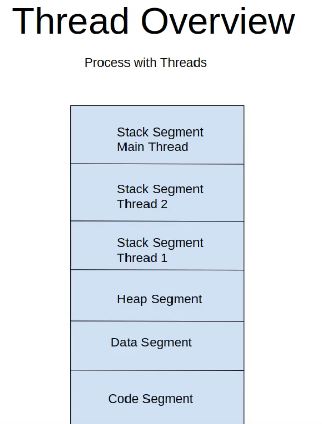  

Every process has its own virtual memory however in threads, they share the same memory except for the stack part.

**int pthread_create(pthread_t \*restrict** _thread_**,**

**const pthread_attr_t \*restrict** _attr_**,**

**typeof(void \*(void \*)) \***_start_routine_**,**

**void \*restrict** _arg_**);**



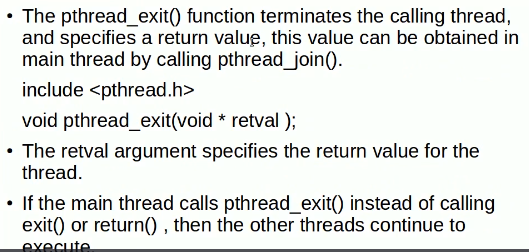

Ps -ef | grep program

… &lt;defunct&gt; means that the main thread exited with pthread_exit but the other thread is still running

If the main program exits with exit, then the complete process and the thread associated with this process will be terminated immediately

**int pthread_join(pthread_t** _thread_**, void \*\***_retval_**);**

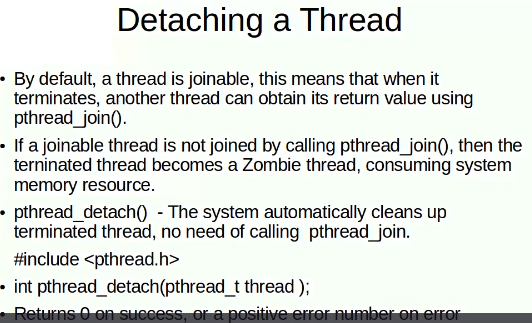

pthread_detach(pthread_self());

# Mutex()

int pthread_mutex_lock(pthread_mutex_t \*_mutex_);

int pthread_mutex_trylock(pthread_mutex_t \*_mutex_);

int pthread_mutex_unlock(pthread_mutex_t \*_mutex_);

The _pthread_mutex_trylock_() function shall fail if:

**EBUSY** The _mutex_ could not be acquired because it was already locked.

int pthread_mutex_timedlock(pthread_mutex_t \*restrict _mutex_,

const struct timespec \*restrict _abstime_);

**ETIMEDOUT**

The mutex could not be locked before the specified timeout

expired.

**pthread_cond_t** _cond_ **\= PTHREAD_COND_INITIALIZER;**

**int pthread_cond_init(pthread_cond_t \***_cond_**,**

**pthread_condattr_t \***_cond_attr_**);**

**int pthread_cond_signal(pthread_cond_t \***_cond_**);**

**int pthread_cond_broadcast(pthread_cond_t \***_cond_**);**

**int pthread_cond_wait(pthread_cond_t \***_cond_**, pthread_mutex_t \***_mutex_**);**

**int pthread_cond_timedwait(pthread_cond_t \***_cond_**, pthread_mutex_t \***_mutex_**,**

**const struct timespec \***_abstime_**);**

**int pthread_cond_destroy(pthread_cond_t \***_cond_**);**

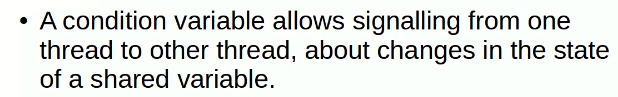

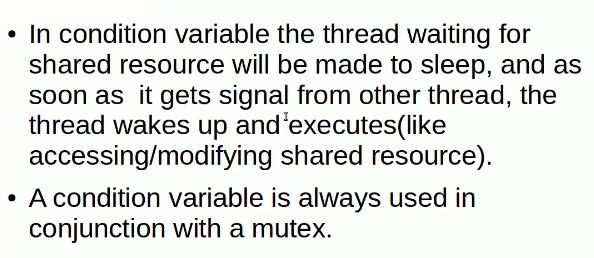

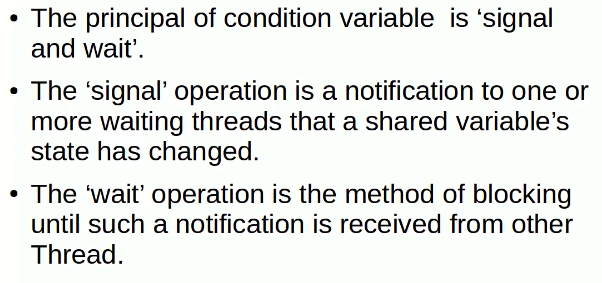



pthread_mutex_t my_mutex = PTHREAD_MUTEX_INITIALIZER;

pthread_cond_t myConVar = PTHREAD_COND_INITIALIZER;

int doneFlag = 0;

char buf\[100\];

/\* Producer thread\*/

void \* threadA(void \*p) {

&nbsp;   printf("\\nthreadA Scheduled first\\n");

&nbsp;   sleep(1);

&nbsp;   pthread_mutex_lock(&my_mutex);

&nbsp;   printf("\\n threadA: critical section executes always first\\n");

&nbsp;   /\*producer will produce data here\*/

&nbsp;   sprintf(buf,"This is data Buffer");

&nbsp;   doneFlag  = 1;

&nbsp;   pthread_cond_signal(&myConVar);

&nbsp;   pthread_mutex_unlock(&my_mutex);

}

# if 1

/\* Consumer thread\*/

void \* threadB(void \*p) {

&nbsp;   printf("\\nthreadB Scheduled first\\n");

&nbsp;   pthread_mutex_lock(&my_mutex);

&nbsp;   if (doneFlag == 0)

&nbsp;       pthread_cond_wait(&myConVar, &my_mutex);

&nbsp;   /\*consumer will consume data here\*/

&nbsp;   printf(" threadB: signal received from threadA, this is always executed after threadA critical section %d\\n", doneFlag);

&nbsp;   printf("\\nThe buffer received from producer thread is (%s)\\n",buf);

&nbsp;   pthread_mutex_unlock(&my_mutex);

}

# endif

int main(int argc, char\*\* argv) {

&nbsp;   srand(time(0));

&nbsp;   pthread_t pthreadA;

&nbsp;   pthread_create(&pthreadA, NULL, threadA, NULL);

&nbsp;   pthread_t pthreadB;

&nbsp;   pthread_create(&pthreadB, NULL, threadB, NULL);

&nbsp;   pthread_join(pthreadA,NULL);

&nbsp;   pthread_join(pthreadB,NULL);

&nbsp;   printf("\\n Main thread is exiting now\\n");

&nbsp;   return (EXIT_SUCCESS);

}

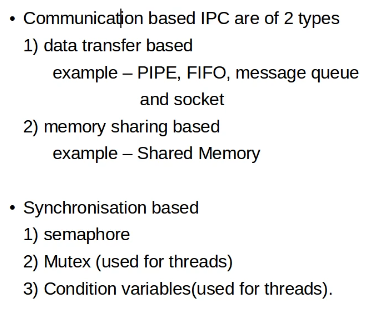

# Pipe()



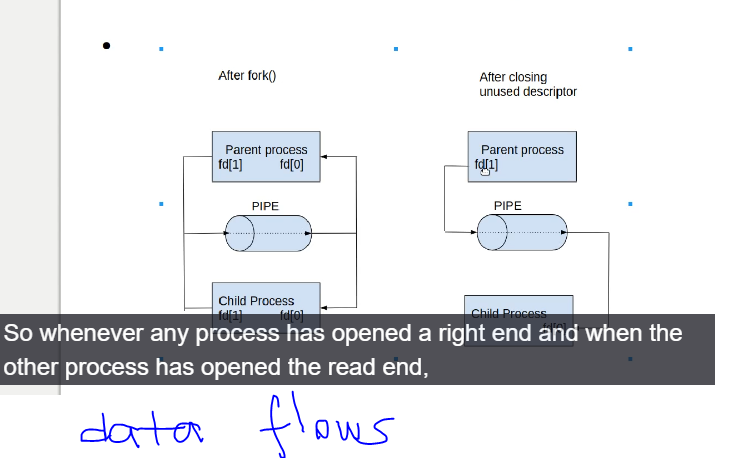

SIGPIPE when closed two ends

# FIFO

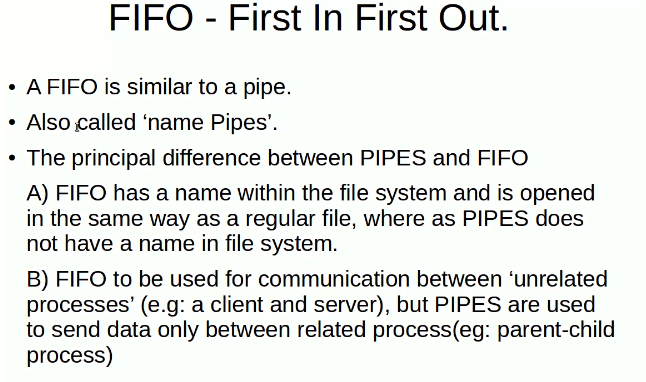

|     |     | File type | Description |
| --- | --- | --- | --- |
| \-  |     | Ordinary or regular files | These files save commonly used data such as text, script, images, videos, etc. |
| d   |     | Directory files | These files save the name and address of other files. |
| b   |     | Block or character special files | These files represent device files such as hard drives, monitors, etc. |
| l   |     | Link files | These files point to or mirror other files in the file system. |
| s   |     | Socket files | These files provide inter-process communication. |
| p   |     | Named pipe files | These files allow processes to exchange data with other processes. |
| c   |     | character special file |     |

# Message Queue

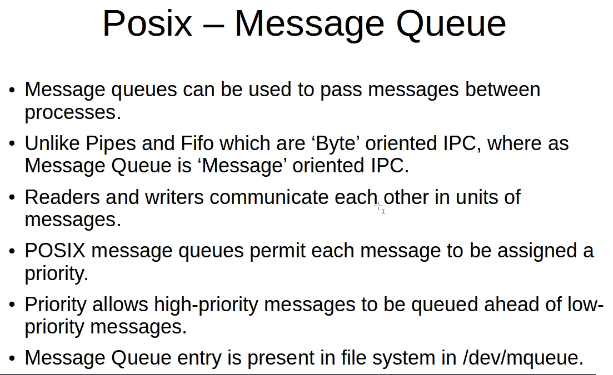

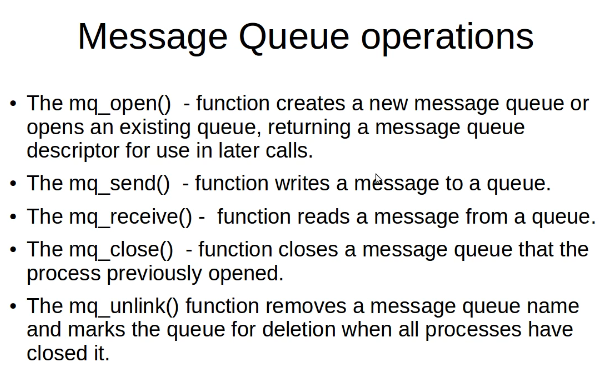

# Semaphore

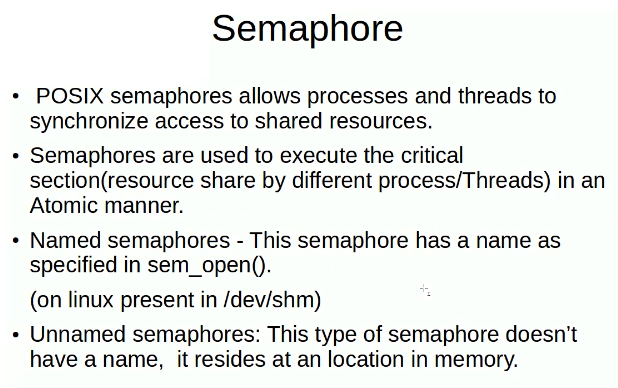

# Shared Memory

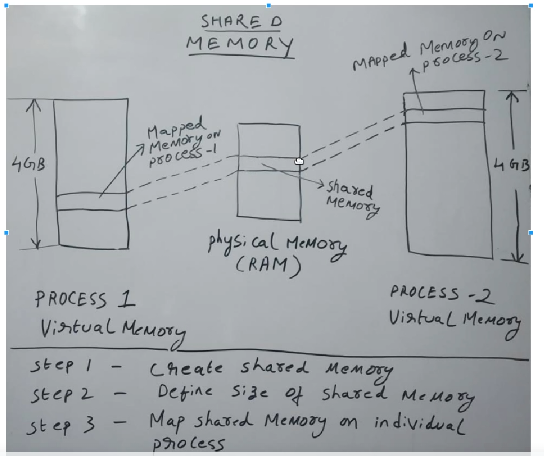

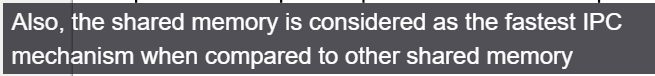



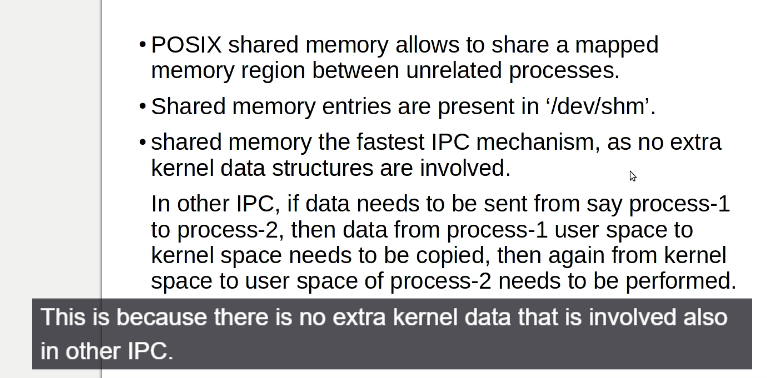

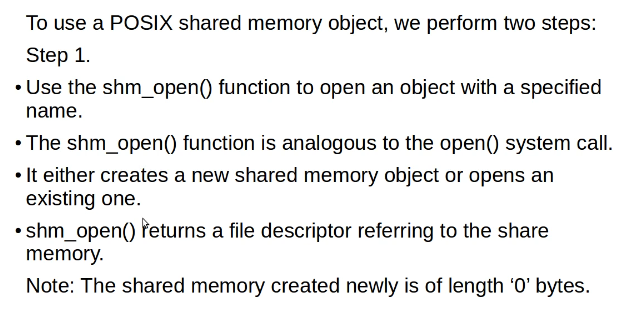

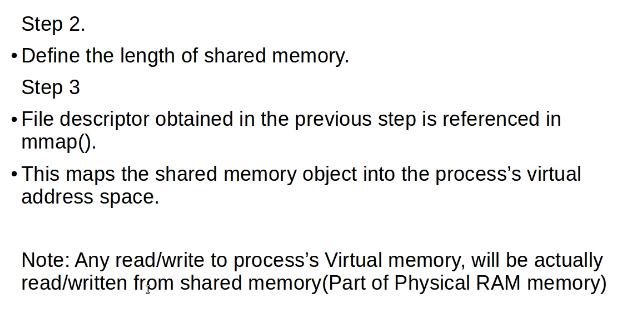



# Nice

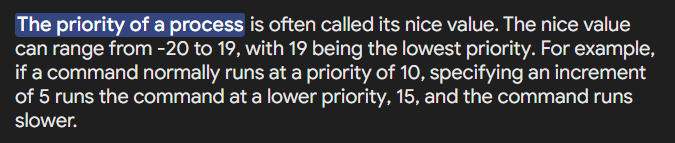

# Deamon

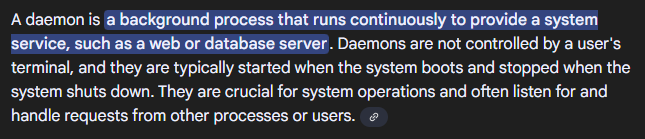

# System call

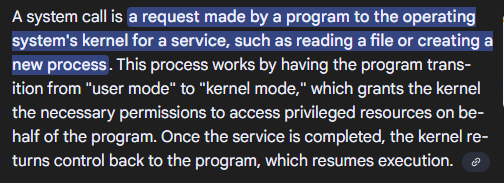

A diagram explaining how system calls work.

# Swap memory

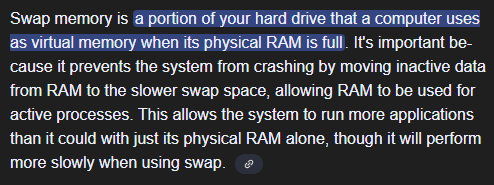

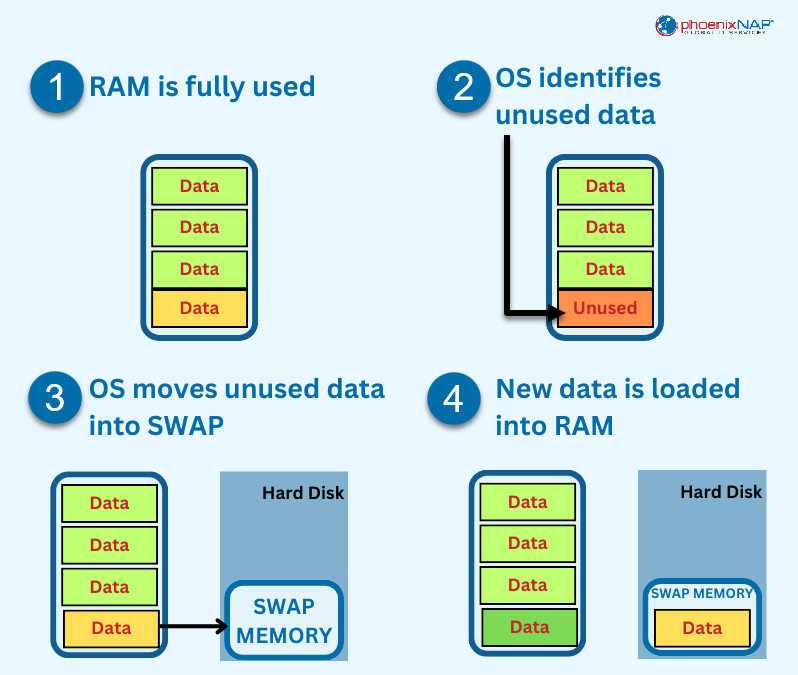

# Libraries

Shared libraries are .so (or in Windows .dll, or in OS X .dylib) files. All the code relating to the library is in this file, and it is referenced by programs using it at run-time. A program using a shared library only makes reference to the code that it uses in the shared library.

Static libraries are .a (or in Windows .lib) files. All the code relating to the library is in this file, and it is directly linked into the program at compile time. A program using a static library takes copies of the code that it uses from the static library and makes it part of the program. \[Windows also has .lib files which are used to reference .dll files, but they act the same way as the first one\].

There are advantages and disadvantages in each method:

- Shared libraries reduce the amount of code that is duplicated in each program that makes use of the library, keeping the binaries small. It also allows you to replace the shared object with one that is functionally equivalent, but may have added performance benefits without needing to recompile the program that makes use of it. Shared libraries will, however have a small additional cost for the execution of the functions as well as a run-time loading cost as all the symbols in the library need to be connected to the things they use. Additionally, shared libraries can be loaded into an application at run-time, which is the general mechanism for implementing binary plug-in systems.
- Static libraries increase the overall size of the binary, but it means that you don't need to carry along a copy of the library that is being used. As the code is connected at compile time there are not any additional run-time loading costs. The code is simply there.

Personally, I prefer shared libraries, but use static libraries when needing to ensure that the binary does not have many external dependencies that may be difficult to meet, such as specific versions of the C++ standard library or specific versions of the Boost C++ library.

# Links

A soft link is a pointer to another file's path, while a hard link is a different directory entry that points directly to the same inode as the original file. A soft link has its own separate inode, whereas a hard link shares the original file's inode, meaning they both reference the same underlying data blocks on the disk.  

Soft link (or symbolic link)

- **Inode:** A soft link has its own unique inode.
- **How it works:** It stores the path of the target file or directory, similar to a shortcut in Windows.
- **Effect of deletion:** If the original file or directory is deleted, the soft link becomes a "dangling link" and is broken because it still points to a non-existent path.
- **Capabilities:** Can link to files on different file systems or even remote computers, and can be used to link to directories.

Hard link

- **Inode:** A hard link shares the same inode number as the original file.
- **How it works:** It is a direct pointer to the data, so there is no separate file created for the link itself.
- **Effect of deletion:** If you delete one hard link, the data is not lost until the last link to that inode is removed, because the file's inode has a link count that is decremented.
- **Capabilities:** Can only be created between files on the same file system, and cannot be used for directories (except by the system).